___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Necessary Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Data Wrangling and Cleaning

In [3]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace(['Female','Male'],[0,1])
df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [9]:
from skimpy import clean_columns
df = clean_columns(df)
df.columns

11 column names have been cleaned

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [10]:
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,0,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,0,41,1,83807.860,1,0,1,112542.580,0
2,502,France,0,42,8,159660.800,3,1,0,113931.570,1
3,699,France,0,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,0,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.000,2,1,0,96270.640,0
9996,516,France,1,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,0,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,1,42,3,75075.310,2,1,0,92888.520,1


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [12]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['geography']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [13]:
df

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1.000,0.000,0.000,619.000,0.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,608.000,0.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,502.000,0.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,699.000,0.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,850.000,0.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,771.000,1.000,39.000,5.000,0.000,2.000,1.000,0.000,96270.640,0.000
9996,1.000,0.000,0.000,516.000,1.000,35.000,10.000,57369.610,1.000,1.000,1.000,101699.770,0.000
9997,1.000,0.000,0.000,709.000,0.000,36.000,7.000,0.000,1.000,0.000,1.000,42085.580,1.000
9998,0.000,1.000,0.000,772.000,1.000,42.000,3.000,75075.310,2.000,1.000,0.000,92888.520,1.000


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [14]:
df.describe()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,0.501,0.251,0.248,650.529,0.546,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,0.500,0.434,0.432,96.653,0.498,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,0.000,0.000,0.000,350.000,0.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,0.000,0.000,0.000,584.000,0.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,1.000,0.000,0.000,652.000,1.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,1.000,1.000,0.000,718.000,1.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,1.000,1.000,1.000,850.000,1.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [15]:
df.corr()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
onehotencoder__x0_France,1.000,-0.580,-0.575,-0.009,0.007,-0.039,-0.003,-0.231,0.001,0.002,0.003,-0.003,-0.105
onehotencoder__x0_Germany,-0.580,1.000,-0.332,0.006,-0.025,0.047,-0.001,0.401,-0.010,0.011,-0.020,0.010,0.173
onehotencoder__x0_Spain,-0.575,-0.332,1.000,0.005,0.017,-0.002,0.004,-0.135,0.009,-0.013,0.017,-0.006,-0.053
credit_score,-0.009,0.006,0.005,1.000,-0.003,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
gender,0.007,-0.025,0.017,-0.003,1.000,-0.028,0.015,0.012,-0.022,0.006,0.023,-0.008,-0.107
age,-0.039,0.047,-0.002,-0.004,-0.028,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
tenure,-0.003,-0.001,0.004,0.001,0.015,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
balance,-0.231,0.401,-0.135,0.006,0.012,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
num_of_products,0.001,-0.010,0.009,0.012,-0.022,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
has_cr_card,0.002,0.011,-0.013,-0.005,0.006,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007


<AxesSubplot:>

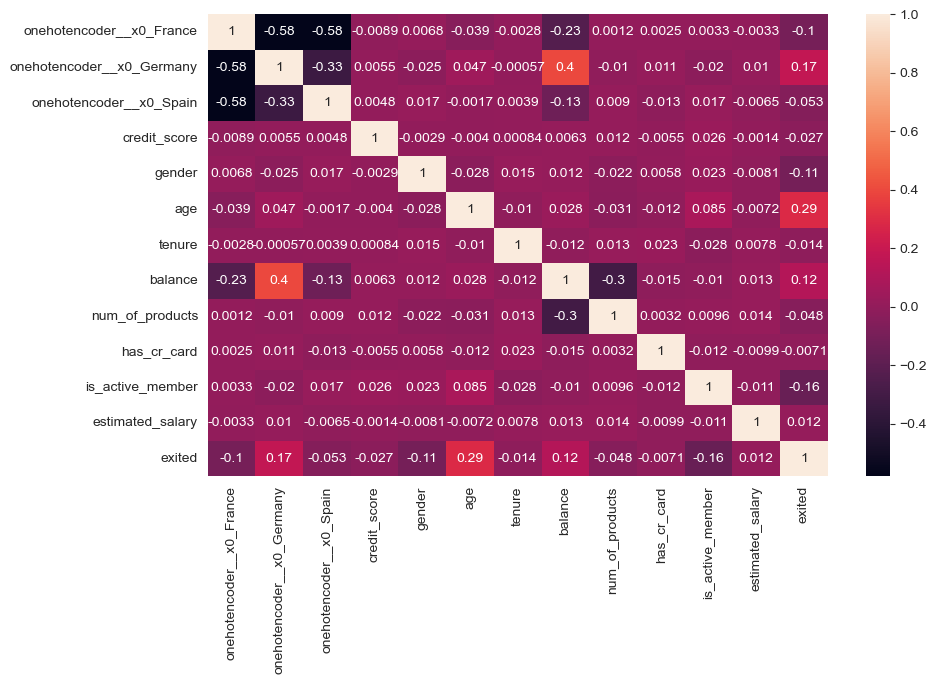

In [16]:
sns.heatmap(df.corr(), annot=True)

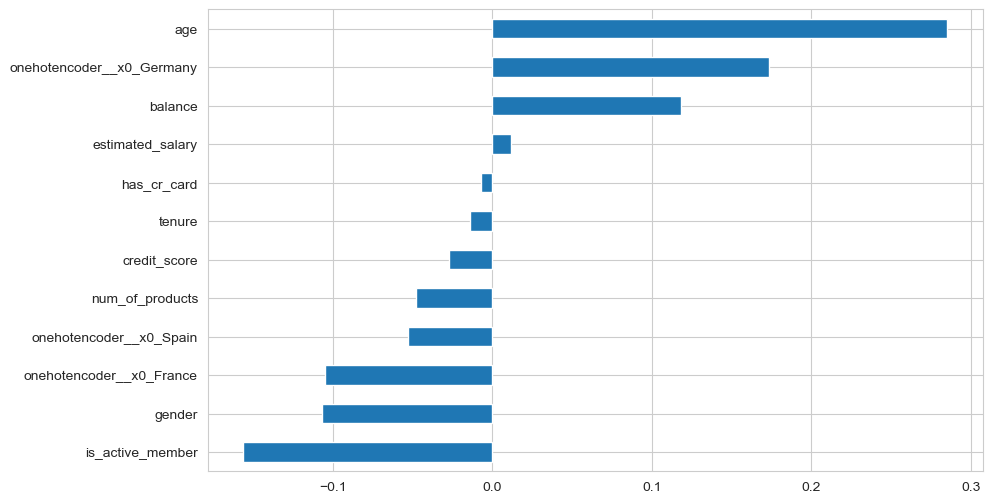

In [17]:
df.corr()["exited"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.show()

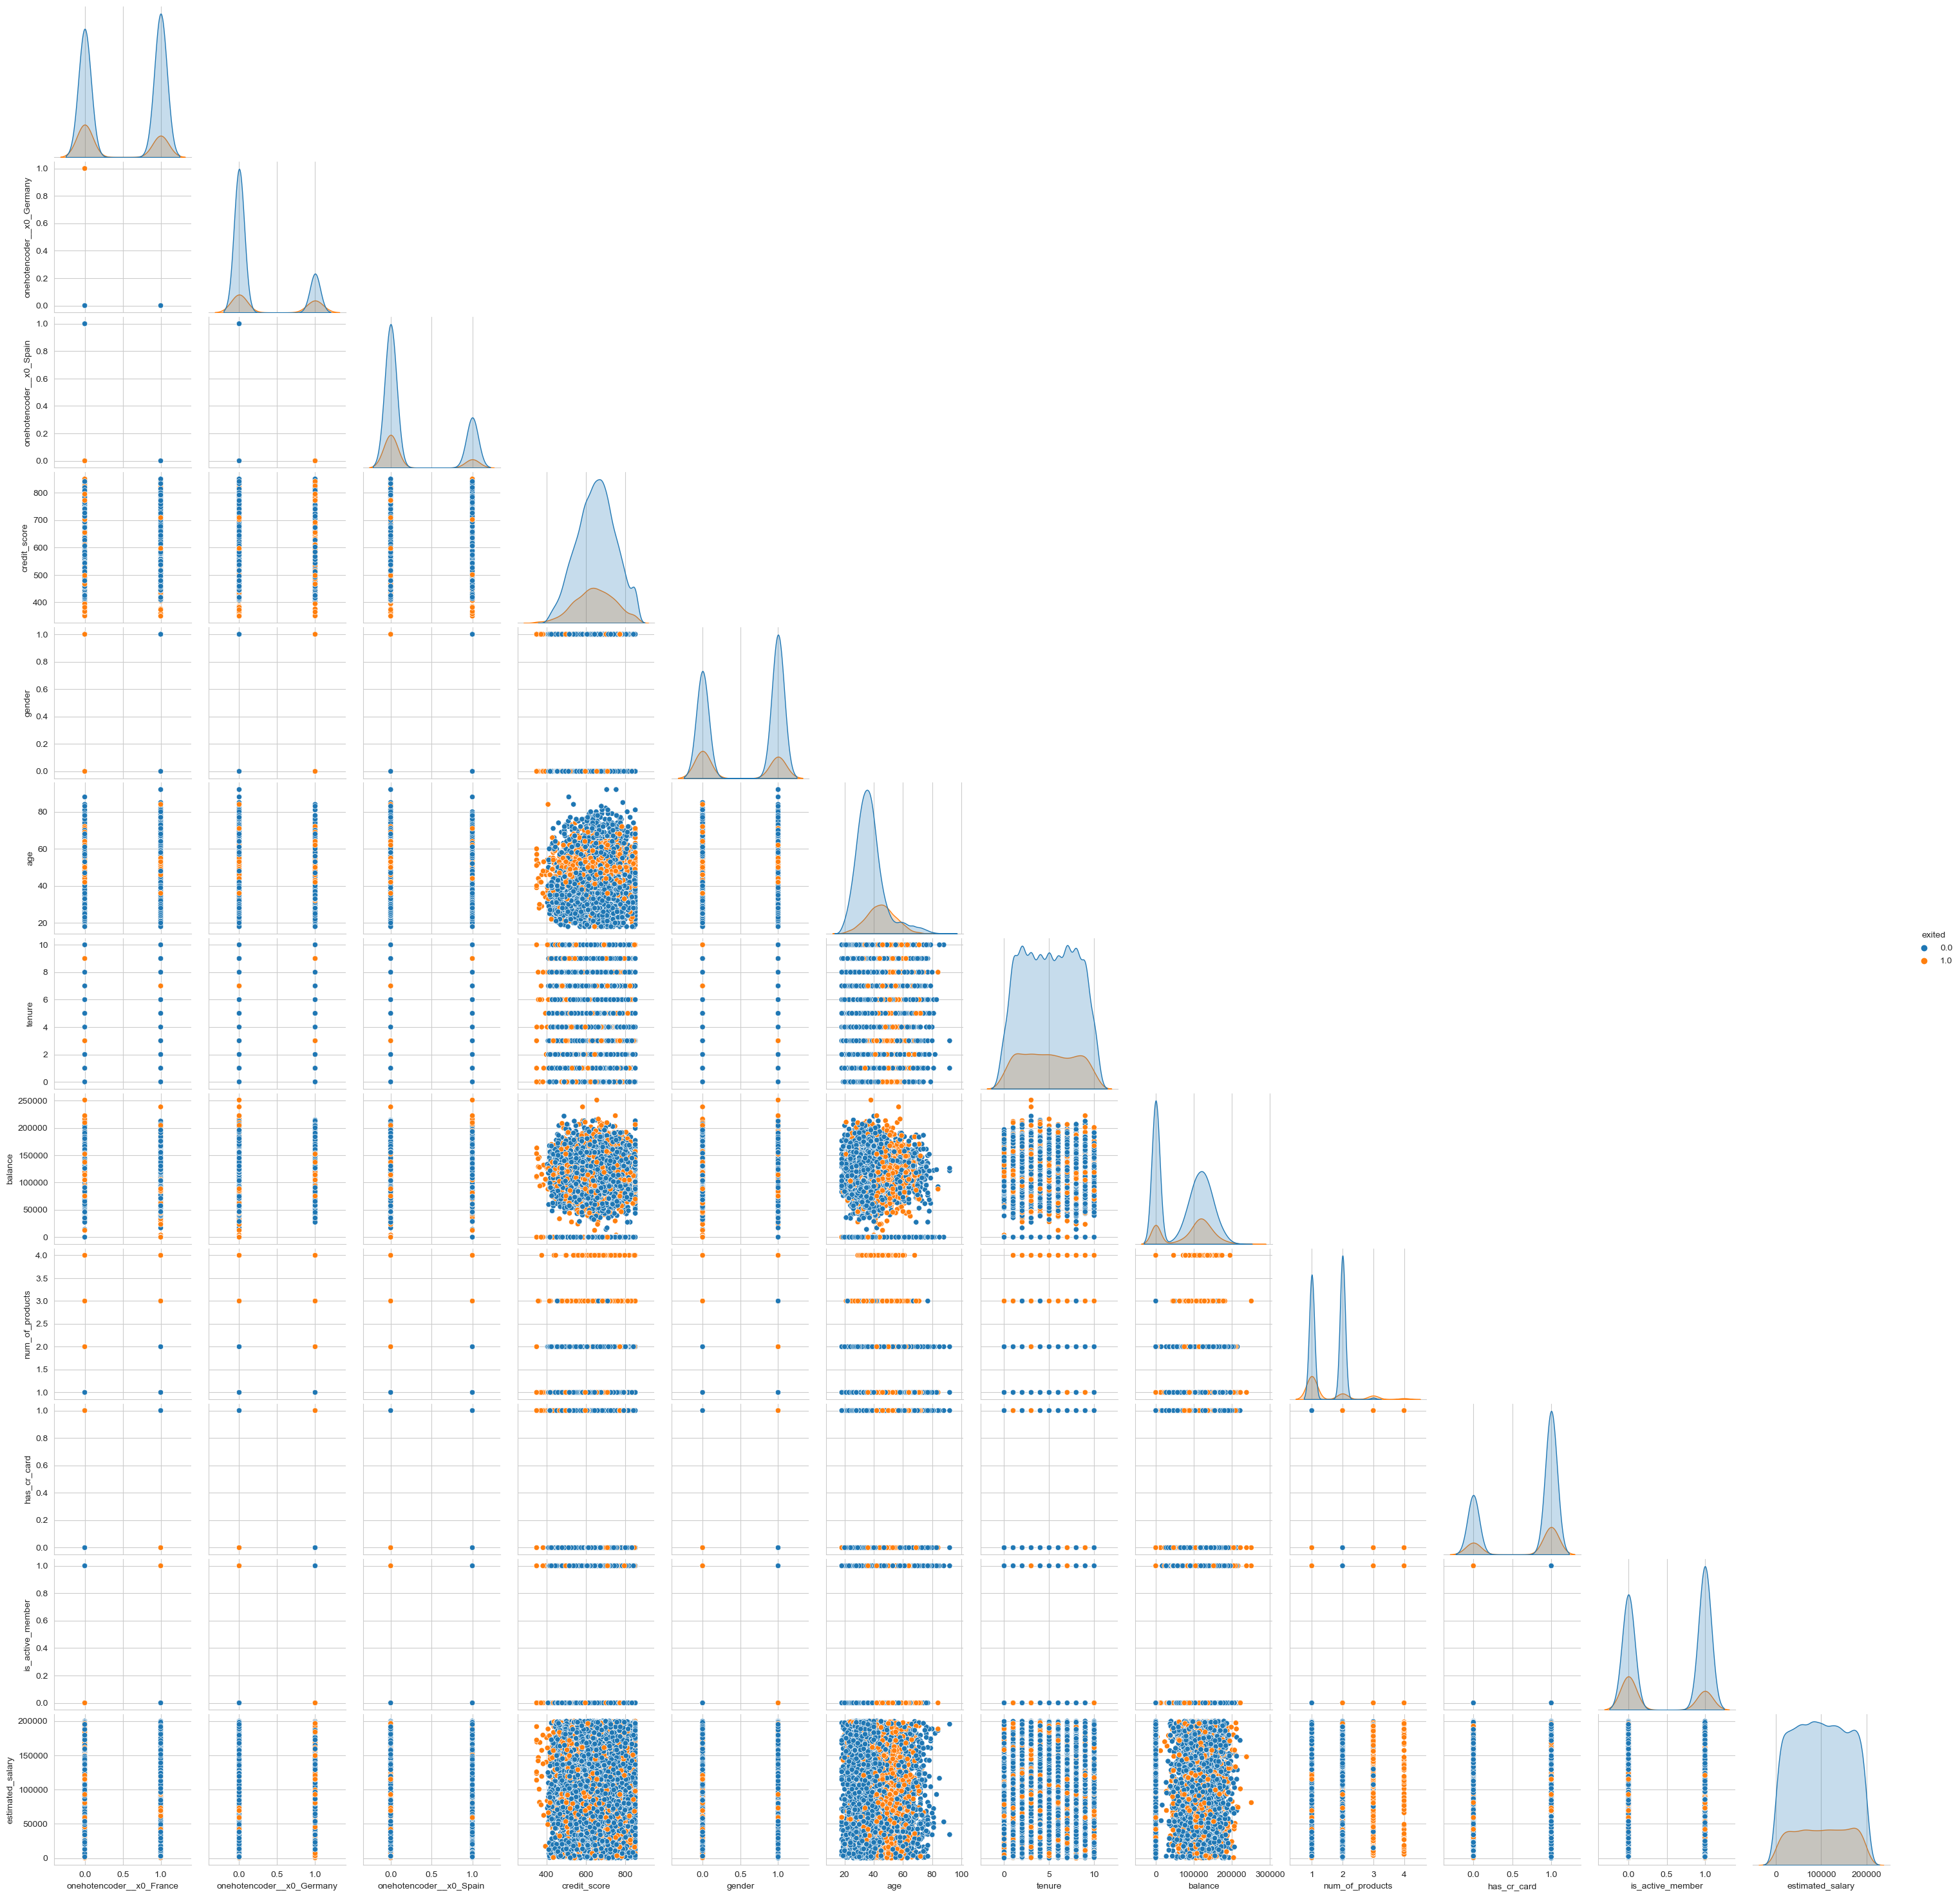

In [18]:
sns.pairplot(df, hue= "exited", corner=True)

In [19]:
df.groupby("exited").mean()

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
exited,,,,,,,,,,,,
0.000,0.528,0.213,0.259,651.853,0.573,37.408,5.033,72745.297,1.544,0.707,0.555,99738.392
1.000,0.398,0.400,0.203,645.351,0.441,44.838,4.933,91108.539,1.475,0.699,0.361,101465.678


# Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [21]:
X = df.drop('exited', axis=1)
y = df['exited']

In [22]:
seed = 42

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [26]:
# pip install tensorflow

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
X_train.shape

(8000, 12)

In [29]:
X_test.shape

(2000, 12)

## without class_weigth

### Create The Model

In [30]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])


In [31]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 32, 
          epochs = 200, 
          verbose=1)


Epoch 1/200
225/225 [==============================] - 1s 3ms/step - loss: 0.6672 - recall: 0.0710 - val_loss: 0.6360 - val_recall: 0.0000e+00
Epoch 2/200
225/225 [==============================] - 0s 1ms/step - loss: 0.6169 - recall: 0.0000e+00 - val_loss: 0.5911 - val_recall: 0.0000e+00
Epoch 3/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5782 - recall: 0.0325 - val_loss: 0.5497 - val_recall: 0.0855
Epoch 4/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5414 - recall: 0.1184 - val_loss: 0.5151 - val_recall: 0.1184
Epoch 5/200
225/225 [==============================] - 0s 1ms/step - loss: 0.5149 - recall: 0.1353 - val_loss: 0.4937 - val_recall: 0.1579
Epoch 6/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4987 - recall: 0.1394 - val_loss: 0.4777 - val_recall: 0.1382
Epoch 7/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4874 - recall: 0.1441 - val_loss: 0.4669 - val_recall: 0.1382
Epoch 8/200
225

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 815
Trainable params: 815
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.667,0.071,0.636,0.000
1,0.617,0.000,0.591,0.000
2,0.578,0.032,0.550,0.086
3,0.541,0.118,0.515,0.118
4,0.515,0.135,0.494,0.158


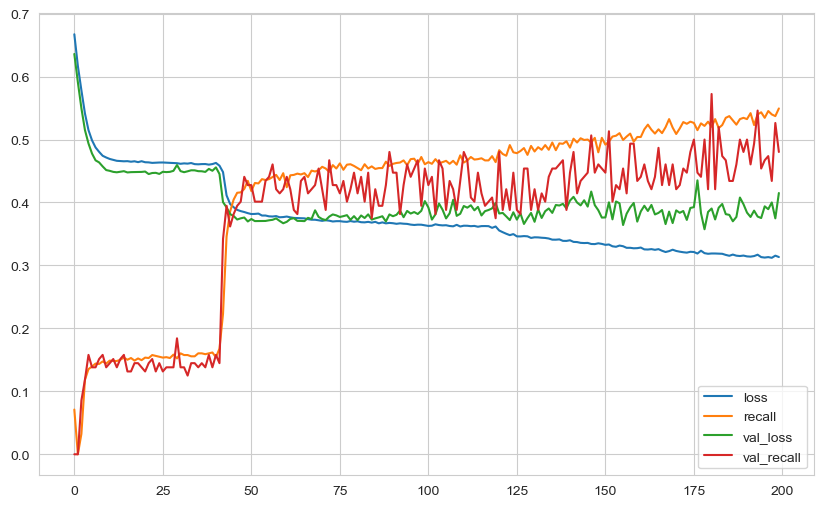

In [34]:
loss_df.plot()
plt.show()

In [35]:
model.evaluate(X_test, y_test, verbose=0)

[0.4124971926212311, 0.4815724790096283]

In [36]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)

Loss     :  0.4124971926212311
Accuracy :  0.4815724790096283


In [37]:
y_pred = model.predict(X_test) > 0.5  # This number is a threshold to decide for 0 or 1.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 773us/step
[[1498   95]
 [ 211  196]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1593
         1.0       0.67      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [129]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', 
                                                  classes=np.unique(y_train), 
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

### Create The Model

In [39]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", 
              loss = "binary_crossentropy", 
              metrics = ["Recall"])


In [40]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
57/57 [==============================] - 1s 5ms/step - loss: 0.6952 - recall: 0.2558 - val_loss: 0.6914 - val_recall: 0.6842
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6857 - recall: 0.5250 - val_loss: 0.6635 - val_recall: 0.6382
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6494 - recall: 0.6475 - val_loss: 0.6062 - val_recall: 0.5987
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6183 - recall: 0.6773 - val_loss: 0.5642 - val_recall: 0.5526
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6066 - recall: 0.6766 - val_loss: 0.5750 - val_recall: 0.6118
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 0.5948 - recall: 0.6908 - val_loss: 0.5716 - val_recall: 0.6250
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 0.5838 - recall: 0.7043 - val_loss: 0.5505 - val_recall: 0.6184
Epoch 8/200
57/57 [======================

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                260       
                                                                 
 dense_6 (Dense)             (None, 16)                336       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 815
Trainable params: 815
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.695,0.256,0.691,0.684
1,0.686,0.525,0.663,0.638
2,0.649,0.647,0.606,0.599
3,0.618,0.677,0.564,0.553
4,0.607,0.677,0.575,0.612


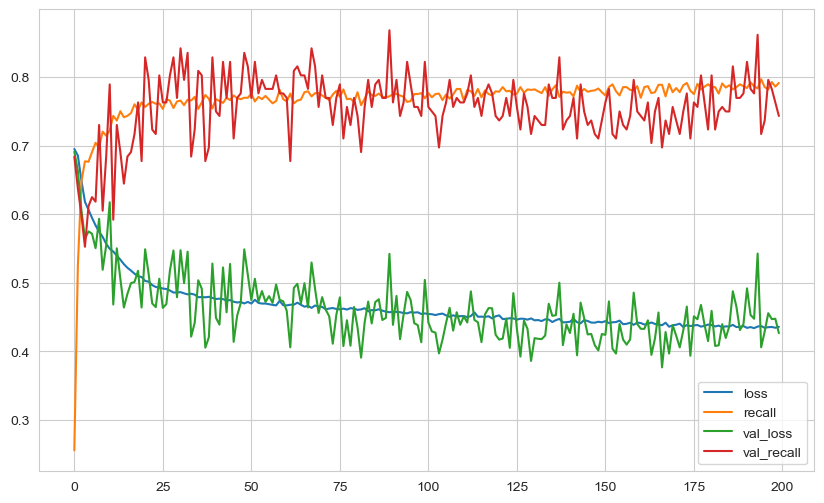

In [43]:
loss_df.plot()
plt.show()

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.4507181942462921, 0.7567567825317383]

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)

Loss     :  0.4507181942462921
Accuracy :  0.7567567825317383


In [46]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 758us/step
[[1279  314]
 [  99  308]]
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1593
         1.0       0.50      0.76      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

In [47]:
from tensorflow.keras.optimizers import Adam

### Increase The Learning Rate and Observe The Results

In [48]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [49]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
57/57 [==============================] - 1s 4ms/step - loss: 0.6945 - recall: 0.1049 - val_loss: 0.6275 - val_recall: 0.3684
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6662 - recall: 0.4756 - val_loss: 0.6077 - val_recall: 0.6184
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6518 - recall: 0.6231 - val_loss: 0.5873 - val_recall: 0.6118
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6392 - recall: 0.6664 - val_loss: 0.5758 - val_recall: 0.6118
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.6806 - val_loss: 0.5790 - val_recall: 0.6711
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6095 - recall: 0.7016 - val_loss: 0.5592 - val_recall: 0.6447
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 0.5942 - recall: 0.7199 - val_loss: 0.5566 - val_recall: 0.6842
Epoch 8/200
57/57 [======================

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.694,0.105,0.628,0.368
1,0.666,0.476,0.608,0.618
2,0.652,0.623,0.587,0.612
3,0.639,0.666,0.576,0.612
4,0.626,0.681,0.579,0.671
...,...,...,...,...
195,0.425,0.773,0.440,0.743
196,0.425,0.773,0.449,0.770
197,0.426,0.779,0.436,0.750
198,0.425,0.782,0.458,0.770


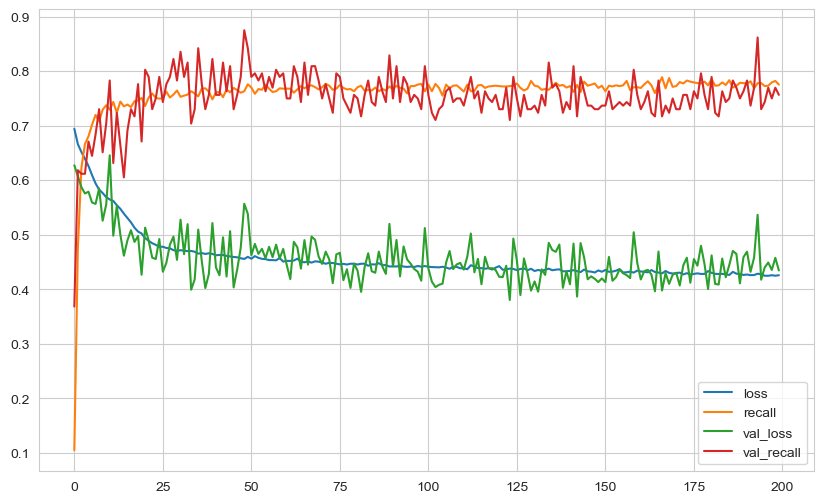

In [51]:
loss_df.plot()
plt.show()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)


Loss     :  0.46643200516700745
Accuracy :  0.7444717288017273


In [53]:
model.evaluate(X_test, y_test, verbose=0)

[0.46643200516700745, 0.7444717288017273]

In [54]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 726us/step
[[1247  346]
 [ 104  303]]
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      1593
         1.0       0.47      0.74      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



### Add Dropout Layer

In [55]:
from tensorflow.keras.layers import Dropout

In [56]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))
model.add(Dropout(0.5))

opt = Adam(lr = 0.002)

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [57]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 5.9332 - recall: 0.4526 - val_loss: 0.6502 - val_recall: 0.1316
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 5.6069 - recall: 0.4303 - val_loss: 0.6079 - val_recall: 0.0263
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 5.4584 - recall: 0.4188 - val_loss: 0.5628 - val_recall: 0.0000e+00
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 5.0438 - recall: 0.4283 - val_loss: 0.5422 - val_recall: 0.0000e+00
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 4.9555 - recall: 0.4127 - val_loss: 0.5418 - val_recall: 0.0000e+00
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 4.8843 - recall: 0.4161 - val_loss: 0.5378 - val_recall: 0.0000e+00
Epoch 7/300
57/57 [==============================] - 0s 2ms/step - loss: 4.8769 - recall: 0.4093 - val_loss: 0.5319 - val_recall: 0.0000e+00
Epoch 8/300
57/57 [==

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,5.933,0.453,0.650,0.132
1,5.607,0.430,0.608,0.026
2,5.458,0.419,0.563,0.000
3,5.044,0.428,0.542,0.000
4,4.955,0.413,0.542,0.000
...,...,...,...,...
295,4.210,0.405,0.448,0.000
296,4.188,0.419,0.447,0.000
297,4.116,0.417,0.453,0.000
298,4.148,0.426,0.442,0.000


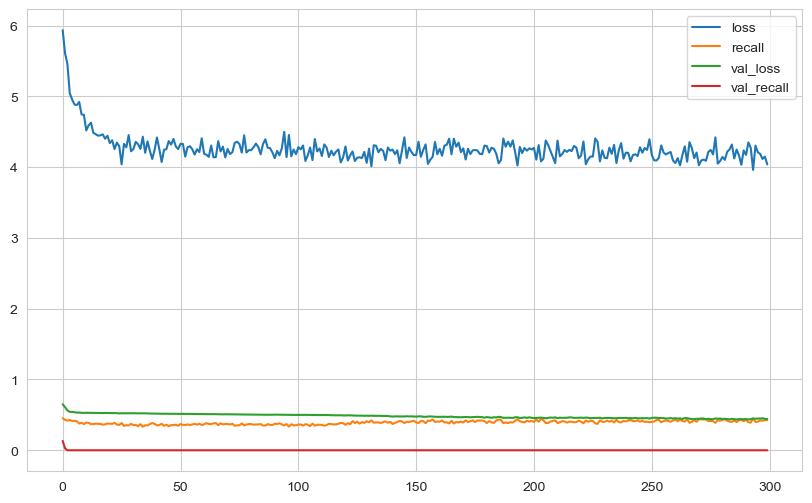

In [59]:
loss_df.plot()
plt.show()

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)

Loss     :  0.45922842621803284
Accuracy :  0.0


In [61]:
model.evaluate(X_test, y_test, verbose=0)

[0.45922842621803284, 0.0]

In [62]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 795us/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1593
         1.0       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



### Add Early Stop

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [64]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [65]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [66]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 0.6898 - recall: 0.0825 - val_loss: 0.6464 - val_recall: 0.4079
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6744 - recall: 0.3870 - val_loss: 0.6114 - val_recall: 0.4868
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6400 - recall: 0.6265 - val_loss: 0.5954 - val_recall: 0.6316
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6135 - recall: 0.6834 - val_loss: 0.5561 - val_recall: 0.5724
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6019 - recall: 0.6881 - val_loss: 0.5802 - val_recall: 0.6382
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5911 - recall: 0.6969 - val_loss: 0.5674 - val_recall: 0.6447
Epoch 7/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5832 - recall: 0.7111 - val_loss: 0.5584 - val_recall: 0.6382
Epoch 8/300
57/57 [======================

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.690,0.083,0.646,0.408
1,0.674,0.387,0.611,0.487
2,0.640,0.627,0.595,0.632
3,0.614,0.683,0.556,0.572
4,0.602,0.688,0.580,0.638
...,...,...,...,...
56,0.468,0.756,0.456,0.796
57,0.466,0.754,0.471,0.809
58,0.470,0.756,0.448,0.783
59,0.465,0.762,0.491,0.829


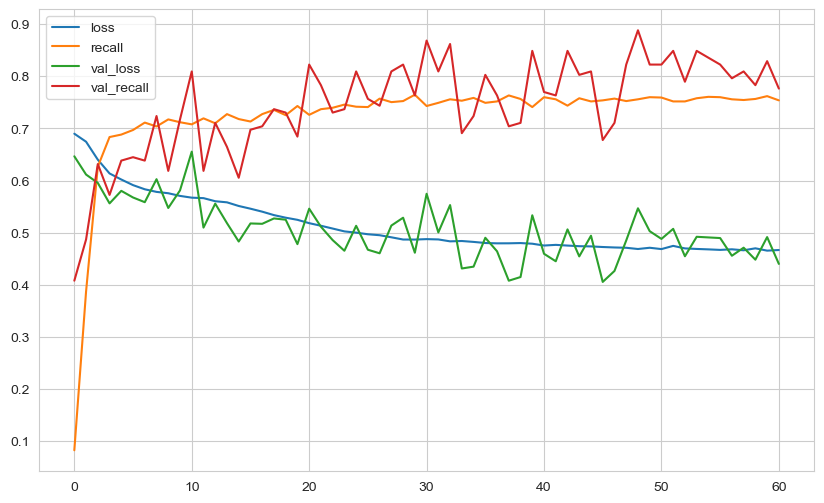

In [68]:
loss_df.plot()
plt.show()

In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)

Loss     :  0.42058032751083374
Accuracy :  0.6781326532363892


In [70]:
model.evaluate(X_test, y_test, verbose=0)

[0.42058032751083374, 0.6781326532363892]

In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 742us/step
[[1348  245]
 [ 131  276]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      1593
         1.0       0.53      0.68      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000



#### Monitor the "val_recall" as metric

In [72]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [73]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [74]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 0.6849 - recall: 0.5345 - val_loss: 0.6837 - val_recall: 0.7105
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6526 - recall: 0.6367 - val_loss: 0.6561 - val_recall: 0.7039
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6270 - recall: 0.6732 - val_loss: 0.5982 - val_recall: 0.5855
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6093 - recall: 0.6793 - val_loss: 0.5690 - val_recall: 0.5658
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5949 - recall: 0.6813 - val_loss: 0.5563 - val_recall: 0.5987
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5797 - recall: 0.6834 - val_loss: 0.5762 - val_recall: 0.6645
Epoch 7/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5664 - recall: 0.7097 - val_loss: 0.5250 - val_recall: 0.6316
Epoch 8/300
57/57 [======================

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.685,0.535,0.684,0.711
1,0.653,0.637,0.656,0.704
2,0.627,0.673,0.598,0.586
3,0.609,0.679,0.569,0.566
4,0.595,0.681,0.556,0.599
5,0.580,0.683,0.576,0.664
6,0.566,0.710,0.525,0.632
7,0.555,0.705,0.567,0.730
8,0.543,0.725,0.499,0.671
9,0.529,0.735,0.499,0.717


<AxesSubplot:>

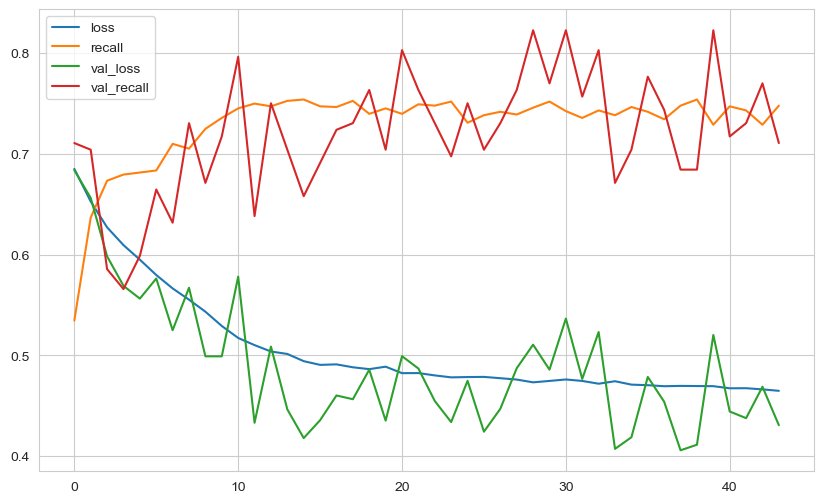

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)

Loss     :  0.5321869850158691
Accuracy :  0.7837837934494019


In [78]:
model.evaluate(X_test, y_test, verbose=0)

[0.5321869850158691, 0.7837837934494019]

In [79]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 726us/step
[[1148  445]
 [  88  319]]
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81      1593
         1.0       0.42      0.78      0.54       407

    accuracy                           0.73      2000
   macro avg       0.67      0.75      0.68      2000
weighted avg       0.82      0.73      0.76      2000



## GridSearchCV

In [80]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [81]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [82]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [83]:
early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "max", verbose = 1, 
                           patience = 20,
                           restore_best_weights = True)


In [84]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn=build_classifier, validation_split = 0.1, epochs=300)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/300
29/29 [==============================] - 1s 8ms/step - loss: 0.6822 - recall: 0.6989 - val_loss: 0.6138 - val_recall: 0.3684
Epoch 2/300
29/29 [==============================] - 0s 2ms/step - loss: 0.6190 - recall: 0.6204 - val_loss: 0.8388 - val_recall: 0.8816
Epoch 3/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5900 - recall: 0.6827 - val_loss: 0.4742 - val_recall: 0.5197
Epoch 4/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5613 - recall: 0.6982 - val_loss: 0.5076 - val_recall: 0.6579
Epoch 5/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5193 - recall: 0.7267 - val_loss: 0.8252 - val_recall: 0.9276
Epoch 6/300
29/29 [==============================] - 0s 2ms/step - loss: 0.5145 - recall: 0.7409 - val_loss: 0.4398 - val_recall: 0.7105
Epoch 7/300
29/29 [==============================] - 0s 2ms/step - loss: 0.4971 - recall: 0.7388 - val_loss: 0.5196 

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000262BEA42460>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [85]:
grid_model.best_score_

0.8940100508663015

In [86]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [87]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
23,0.894,0.030,1,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
17,0.893,0.041,2,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
21,0.869,0.035,3,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
5,0.867,0.050,4,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
11,0.866,0.015,5,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
19,0.856,0.034,6,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
16,0.854,0.075,7,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
3,0.847,0.056,8,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
9,0.843,0.026,9,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
13,0.835,0.078,10,"{'batch_size': 256, 'learn_rate': 0.001, 'opti..."


In [88]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 710us/step
[[736 857]
 [ 32 375]]
              precision    recall  f1-score   support

         0.0       0.96      0.46      0.62      1593
         1.0       0.30      0.92      0.46       407

    accuracy                           0.56      2000
   macro avg       0.63      0.69      0.54      2000
weighted avg       0.83      0.56      0.59      2000



63/63 [==============================] - 0s 774us/step


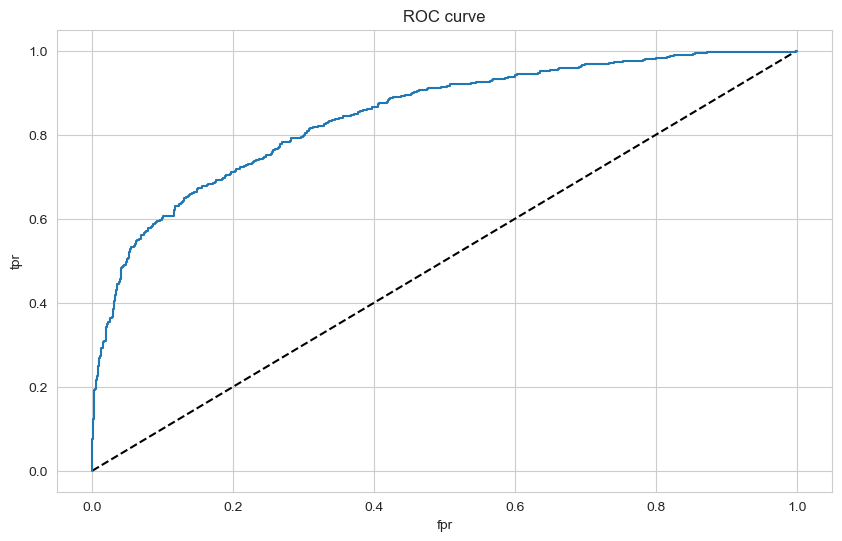

In [89]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.8448741499588956

In [93]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 3, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "RMSprop", loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [95]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 300)
parameters = {'batch_size': [256],
              'optimizer': [RMSprop],
              'learn_rate': [0.005]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall', # recall parameter is sometimes required to be written lowercase.
                          cv = 10,
#                          n_jobs = -1, -----> sometimes this parameter causes problems, in that case you can delete it.
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Epoch 1/300
26/26 [==============================] - 1s 9ms/step - loss: 0.6888 - recall: 0.2607 - val_loss: 0.6782 - val_recall: 0.0000e+00
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6676 - recall: 7.6453e-04 - val_loss: 0.6510 - val_recall: 0.0000e+00
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 0.6331 - recall: 0.0000e+00 - val_loss: 0.6052 - val_recall: 0.0000e+00
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5808 - recall: 0.0000e+00 - val_loss: 0.5433 - val_recall: 0.0000e+00
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5234 - recall: 0.0000e+00 - val_loss: 0.4940 - val_recall: 0.0000e+00
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4926 - recall: 0.0000e+00 - val_loss: 0.4795 - val_recall: 0.0000e+00
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000262C25C7A30>,
             param_grid={'batch_size': [256], 'learn_rate': [0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall', verbose=1)

# Final Model and Model Deployment

In [131]:
import pickle
pickle.dump(scaler, open("model_bankingchurn", 'wb'))

In [132]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 4, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    opt = tf.keras.optimizers.RMSprop(learning_rate=0.005)

    classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['recall'])
    return classifier

In [133]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20, restore_best_weights = True)

In [134]:
model.fit(x = X_train, y = y_train, 
          validation_data = (X_test, y_test), 
          batch_size = 256, 
          epochs = 300, 
          verbose = 1,
          class_weight=class_weights)

Epoch 1/300
32/32 [==============================] - 0s 3ms/step - loss: 0.4662 - recall: 0.7393 - val_loss: 0.4356 - val_recall: 0.7494
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4402 - recall: 0.7718 - val_loss: 0.4339 - val_recall: 0.7396
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4401 - recall: 0.7681 - val_loss: 0.4468 - val_recall: 0.7494
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4382 - recall: 0.7663 - val_loss: 0.4711 - val_recall: 0.7740
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4406 - recall: 0.7656 - val_loss: 0.5331 - val_recall: 0.8059
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4403 - recall: 0.7644 - val_loss: 0.4409 - val_recall: 0.7445
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4407 - recall: 0.7632 - val_loss: 0.4310 - val_recall: 0.7322
Epoch 8/300
32/32 [======================

In [135]:
model.history.history

{'loss': [0.46621784567832947,
  0.4402100443840027,
  0.4400938153266907,
  0.4382480978965759,
  0.44062283635139465,
  0.440307080745697,
  0.4406517446041107,
  0.43893247842788696,
  0.43542951345443726,
  0.4369451403617859,
  0.43835121393203735,
  0.4359464645385742,
  0.4379517734050751,
  0.43822377920150757,
  0.4359661936759949,
  0.4357381761074066,
  0.4371604919433594,
  0.43514201045036316,
  0.43556371331214905,
  0.43437695503234863,
  0.43343040347099304,
  0.43614840507507324,
  0.43261468410491943,
  0.43414294719696045,
  0.43436822295188904,
  0.4329567849636078,
  0.4341382086277008,
  0.4341396689414978,
  0.43699008226394653,
  0.43267738819122314,
  0.4348200261592865,
  0.4320569634437561,
  0.4339527189731598,
  0.4328829050064087,
  0.43198198080062866,
  0.43054327368736267,
  0.43187257647514343,
  0.43339839577674866,
  0.4311418831348419,
  0.43074706196784973,
  0.43461331725120544,
  0.4321618676185608,
  0.4308582544326782,
  0.43037500977516174,
  

In [113]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.322,0.485,0.341,0.501
1,0.323,0.487,0.341,0.440
2,0.323,0.484,0.342,0.489
3,0.322,0.483,0.343,0.477
4,0.323,0.486,0.348,0.541
5,0.323,0.487,0.343,0.437
6,0.324,0.483,0.342,0.440
7,0.323,0.493,0.343,0.484
8,0.321,0.494,0.341,0.447
9,0.322,0.487,0.347,0.391


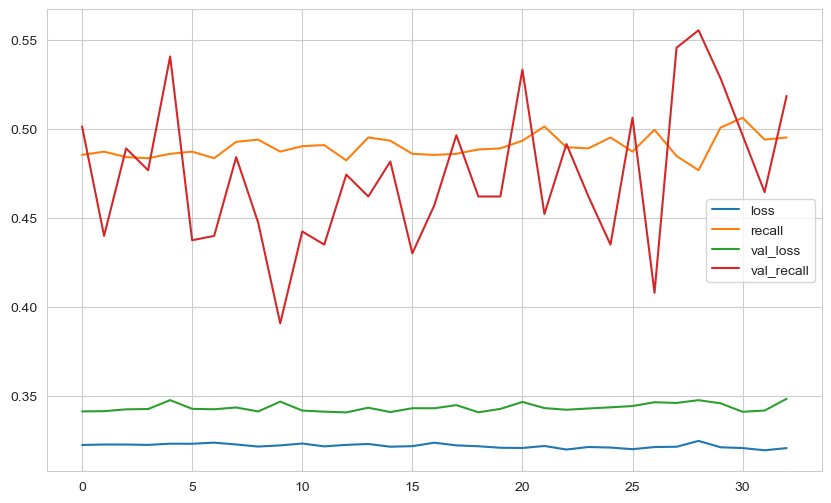

In [136]:
loss_df.plot()
plt.show()

In [137]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss     : ", loss)
print("Accuracy : ", accuracy)

Loss     :  0.5339460372924805
Accuracy :  0.7813267707824707


In [138]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 920us/step
[[1160  433]
 [  89  318]]
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82      1593
         1.0       0.42      0.78      0.55       407

    accuracy                           0.74      2000
   macro avg       0.68      0.75      0.68      2000
weighted avg       0.83      0.74      0.76      2000



In [139]:
model.save('model_customer_churn.h5')

## Prediction

In [141]:
from tensorflow.keras.models import load_model

In [142]:
model_bankingchurn = load_model('model_customer_churn.h5')
scaler_bankingchurn = pickle.load(open("model_bankingchurn", "rb"))

In [143]:
single_customer = df.drop('exited', axis = 1).iloc[10:11, :]
single_customer

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
10,1.000,0.000,0.000,528.000,1.000,31.000,6.000,102016.720,2.000,0.000,0.000,80181.120


In [144]:
single_customer = scaler_bankingchurn.transform(single_customer) # Scale imizi transform yapıyoruz yoksa sonuçlarımız yanlış gelir
single_customer

array([[1.        , 0.        , 0.        , 0.356     , 1.        ,
        0.17567568, 0.6       , 0.42794481, 0.33333333, 0.        ,
        0.        , 0.40088598]])

In [145]:
(model_bankingchurn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 67ms/step


array([[0]])

In [146]:
df["exited"].iloc[10]

0.0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___